# **Anime Recommendation System Analysis**
**Group Members:**

Grace Kung, Allen Chiu, Pin-Chen Kuo, Emily Su, Hannie Han, Maggie Croghan

![image](https://i.ibb.co/vG2q7sC/image.png)

# Introduction
**I. What you will gain after reading the analysis?**

*   Data-Driven Audience Insights: Who are they? What do they like? How do they rate?
*   Actionable Recommendations for Growth: How to recommendation system design without using ML models?

**II. Executive Summary**

The project discovers anime users' demographics and rating patterns in order to find out what animes they like, and in what ways an anime platform can build a recommendation system.

In the data cleaning phase, we joined 3 data sets and kept 19 critical columns shown in Data Dictionary section. For the EDA section, we found that users are primarily aged 25-39, located in Europe and North America. The top 3 popular genres are Award Winning, Suspense, and Avant Garde. The top 3 popular sources are Manga, Original, and Web Manga. Lastly, it demonstrated no clear correlation between satisfaction and engagement levels.

The next step is discovering what factors to choose to build a recommendation system. The results reveals that there's no significant differences in preferences among groups with different demographic variables, and users exhibit high rating stability (low variance within genre/type/source). This implies that we can use a user's preference on genre, type, and source to predict what animes the user will like.

In conclusion, this project points out that an item-based recommendation approach could be more suitable than user-based approach.

**III. Business Value**

Enhance anime platforms' ability to increase user engagement by airing and recommendating proper contents, driving sustainable growth.


## Project Proposal
**IV. Problem Definition**

This project aims to analyze anime datasets to understand the user behavior, and the find out critical columns for building a recommendation system for the anime platform.

Question 1: What animes should they air to attract users watching?

Question 2: What factors are critical for building a resommendation system?

**V. Data Source**

[Anime Dataset 2023](https://www.kaggle.com/datasets/dbdmobile/myanimelist-dataset?select=final_animedataset.csv) (Kaggle,
Author: Sajid uddin)

# Data Dictionary

| Column        | Data Type | Description |
|----------------|------------|-------------|
| user_id        | int32      | Unique ID for each user |
| anime_id       | int32      | Unique ID for each anime |
| rating         | int8       | The rating given by the user to the anime |
| Mal ID         | int32      | Unique ID for each user |
| Gender         | category   | The gender of the user (Female, Male, Non-Binary) |
| Age            | float64    | The age of the user at the time the data was collected |
| Days Watched   | float64    | The total time of a user spending on watching anime (unit: day) |
| Mean Score     | float32    | The average score given by the user to all the anime they have watched |
| Location       | category   | The location or country of the user |
| English name   | category   | English name of the anime |
| Score          | float32    | The average rating given to the anime |
| Genres         | category   | The genres of the anime (e.g., Action, Adventure, etc.) |
| Type           | category   | The type of the anime (e.g., TV series, movie, OVA, etc.) |
| Source         | category   | The source materials of the anime (e.g., manga, light novel, original, etc.) |
| Rank           | int16      | The rank of the anime based on popularity and other criteria |
| Popularity     | int16      | The popularity rank of the anime |
| Favorites      | int32      | The number of times the anime was marked as a favorite by users |
| Scored By      | int32      | The number of users who scored the anime |
| Members        | int32      | The number of members who have added the anime to their list on the platform |

# Table of Contents

0. Upload Files
1. Data Cleaning
2. User Demographics & Rating Behavior
* Rating Behavior: Rating Distribution
* Who They Are: Gender & Age Distribution
* Who Are Heavy Users: Days Watched Distribution
* Relation Between Days Watched & Rating Behavior
* Where Do They Live: Location Distribution
3. Cross-Group Preference Analysis
* Genre Preferences Across Regions
* Genre Preferences Across Age Groups
* Genre Preferences Across Gender
4. Main Audience Insights
* Main Audience’s Preference on Genres (Ages 25–39)
* Main Audience’s Preference on Sources (Ages 25–39)
5. Popularity & Ranking Relationships
* Relation Between Rank & Popularity
* Relation Between Score & Popularity
6. Rating Consistency Analysis
* Within Same Genre
* Within Same Type
* Within Same Source
7. Summary & Recommendations
8. Challenges
9. Generative AI Disclosure

# Upload Files

In [ ]:
# Upload files
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving anime-dataset-2023.csv to anime-dataset-2023.csv
Saving users-details-2023.csv to users-details-2023.csv
Saving users-score-2023.csv to users-score-2023.csv
User uploaded file "anime-dataset-2023.csv" with length 15924739 bytes
User uploaded file "users-details-2023.csv" with length 73927314 bytes
User uploaded file "users-score-2023.csv" with length 1157881770 bytes


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
mkdir -p gdrive/MyDrive/02_02_BA780/BA780_Project/

In [ ]:
!cp anime-dataset-2023.csv gdrive/MyDrive/02_02_BA780/BA780_Project
!cp users-details-2023.csv gdrive/MyDrive/02_02_BA780/BA780_Project
!cp users-score-2023.csv gdrive/MyDrive/02_02_BA780/BA780_Project

cp: cannot stat 'anime-dataset-2023.csv': No such file or directory
cp: cannot stat 'users-details-2023.csv': No such file or directory
cp: cannot stat 'users-score-2023.csv': No such file or directory


In [ ]:
# check whether files are in the drive
!ls gdrive/MyDrive/02_02_BA780/BA780_Project

 A07-Anime-Recommendation-System-Analysis.ipynb   Group7_EDA_Name
 anime-dataset-2023.csv				  test_ratings.csv
 BA780_Group7.ipynb				  train_ratings.csv
'BA780 Project_Group7.gdoc'			  users-details-2023.csv
'BA780 Project.gslides'				  users-score-2023.csv
 cleaned


# Data Cleaning (Please fold this section)

In [ ]:
import re
import numpy as np
import pandas as pd

anime = pd.read_csv("gdrive/MyDrive/02_02_BA780/BA780_Project/anime-dataset-2023.csv")
users = pd.read_csv("gdrive/MyDrive/02_02_BA780/BA780_Project/users-details-2023.csv")
scores = pd.read_csv("gdrive/MyDrive/02_02_BA780/BA780_Project/users-score-2023.csv")

anime.info()
users.info()
scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24905 entries, 0 to 24904
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   anime_id      24905 non-null  int64 
 1   Name          24905 non-null  object
 2   English name  24905 non-null  object
 3   Other name    24905 non-null  object
 4   Score         24905 non-null  object
 5   Genres        24905 non-null  object
 6   Synopsis      24905 non-null  object
 7   Type          24905 non-null  object
 8   Episodes      24905 non-null  object
 9   Aired         24905 non-null  object
 10  Premiered     24905 non-null  object
 11  Status        24905 non-null  object
 12  Producers     24905 non-null  object
 13  Licensors     24905 non-null  object
 14  Studios       24905 non-null  object
 15  Source        24905 non-null  object
 16  Duration      24905 non-null  object
 17  Rating        24905 non-null  object
 18  Rank          24905 non-null  object
 19  Popu

Data Cleaning (1): Anime Dataset
1. Drop unnecessary columns
2. Check whether there's missing value
3. Replace "UNKNOWN" values with NaN
4. Drop rows with NaN in critical columns
5. Ensure Score is between 1-10
6. Ensure columns are numeric
7. Save the cleaned dataset to CSV

---
anime_cleaned_clean.csv

In [ ]:
# Drop unnecessary columns
anime_cleaned = anime.drop(columns=[
    "Name", "Other name", "Synopsis", "Episodes", "Aired",
    "Status", "Producers", "Licensors", "Studios",
    "Duration", "Rating", "Image URL"
], errors="ignore")  # avoid errors if a column is missing

# Display dataset info
print("\n=== Anime Dataset Info ===")
anime_cleaned.info()

# Check missing values
print("\n=== Missing Values Count ===")
print(anime_cleaned.isna().sum())

# Check unique values and sample entries for format consistency
print("\n=== Unique Values and Samples ===")
for col in anime_cleaned.columns:
    print(f"\n[{col}]")
    print("Unique values count:", anime_cleaned[col].nunique())
    print("Sample values:", anime_cleaned[col].dropna().unique()[:10])


=== Anime Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24905 entries, 0 to 24904
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   anime_id      24905 non-null  int64 
 1   English name  24905 non-null  object
 2   Score         24905 non-null  object
 3   Genres        24905 non-null  object
 4   Type          24905 non-null  object
 5   Premiered     24905 non-null  object
 6   Source        24905 non-null  object
 7   Rank          24905 non-null  object
 8   Popularity    24905 non-null  int64 
 9   Favorites     24905 non-null  int64 
 10  Scored By     24905 non-null  object
 11  Members       24905 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 2.3+ MB

=== Missing Values Count ===
anime_id        0
English name    0
Score           0
Genres          0
Type            0
Premiered       0
Source          0
Rank            0
Popularity      0
Favorites       0
Scored By      

In [ ]:
# Replace "UNKNOWN" values with NaN except for 'Type'
for col in anime_cleaned.columns:
    if col != "Type":
        anime_cleaned[col] = anime_cleaned[col].replace(["UNKNOWN", "Unknown"], np.nan)
# Double-check missing values after replacement
print("\n=== Missing Values Count After Replacement ===")
print(anime_cleaned.isna().sum())


=== Missing Values Count After Replacement ===
anime_id            0
English name    14577
Score            9213
Genres           4929
Type                0
Premiered       19399
Source           3689
Rank             4612
Popularity          0
Favorites           0
Scored By        9213
Members             0
dtype: int64


In [ ]:
# Drop rows with NaN in critical columns
anime_cleaned = anime_cleaned.dropna()

# Reset index after dropping rows
anime_cleaned = anime_cleaned.reset_index(drop=True)

# Check dataset shape and missing values again
print("\n=== Dataset Shape After Dropping Rows ===")
print(anime_cleaned.shape)

print("\n=== Missing Values Count After Dropping Rows ===")
print(anime_cleaned.isna().sum())


=== Dataset Shape After Dropping Rows ===
(2922, 12)

=== Missing Values Count After Dropping Rows ===
anime_id        0
English name    0
Score           0
Genres          0
Type            0
Premiered       0
Source          0
Rank            0
Popularity      0
Favorites       0
Scored By       0
Members         0
dtype: int64


In [ ]:
# Ensure Score is numeric
anime_cleaned["Score"] = pd.to_numeric(anime_cleaned["Score"], errors="coerce")

# Identify invalid rows (Score < 0 or Score > 10)
invalid_scores = anime_cleaned[(anime_cleaned["Score"] < 0) | (anime_cleaned["Score"] > 10)]
print("\n=== Invalid Score Rows ===")
print(invalid_scores[["anime_id", "English name", "Score"]])

# Drop invalid rows
anime_cleaned = anime_cleaned.drop(invalid_scores.index).reset_index(drop=True)

print("\n=== Dataset Shape After Dropping Invalid Scores ===")
print(anime_cleaned.shape)


=== Invalid Score Rows ===
Empty DataFrame
Columns: [anime_id, English name, Score]
Index: []

=== Dataset Shape After Dropping Invalid Scores ===
(2922, 12)


In [ ]:
# Ensure columns are numeric
for col in ["Rank", "Popularity", "Scored By", "Members"]:
    anime_cleaned[col] = pd.to_numeric(anime_cleaned[col], errors="coerce")

# Identify invalid rows (negative values)
invalid_rows = anime_cleaned[
    (anime_cleaned["Rank"] < 0) |
    (anime_cleaned["Popularity"] < 0) |
    (anime_cleaned["Scored By"] < 0) |
    (anime_cleaned["Members"] < 0)
]

print("\n=== Invalid Rows with Negative Values ===")
print(invalid_rows[["anime_id", "English name", "Rank", "Popularity", "Scored By", "Members"]])

# Drop invalid rows
anime_cleaned = anime_cleaned.drop(invalid_rows.index).reset_index(drop=True)

print("\n=== Dataset Shape After Dropping Invalid Rows ===")
print(anime_cleaned.shape)


=== Invalid Rows with Negative Values ===
Empty DataFrame
Columns: [anime_id, English name, Rank, Popularity, Scored By, Members]
Index: []

=== Dataset Shape After Dropping Invalid Rows ===
(2922, 12)


In [ ]:
anime_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2922 entries, 0 to 2921
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   anime_id      2922 non-null   int64  
 1   English name  2922 non-null   object 
 2   Score         2922 non-null   float64
 3   Genres        2922 non-null   object 
 4   Type          2922 non-null   object 
 5   Premiered     2922 non-null   object 
 6   Source        2922 non-null   object 
 7   Rank          2922 non-null   float64
 8   Popularity    2922 non-null   int64  
 9   Favorites     2922 non-null   int64  
 10  Scored By     2922 non-null   float64
 11  Members       2922 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 274.1+ KB


In [ ]:
# Save the cleaned dataset to CSV
output_path = "gdrive/MyDrive/02_02_BA780/BA780_Project/cleaned/anime_cleaned_clean.csv"
anime_cleaned.to_csv(output_path, index=False)

print(f"\n=== File saved successfully to: {output_path} ===")


=== File saved successfully to: gdrive/MyDrive/02_02_BA780/BA780_Project/cleaned/anime_cleaned_clean.csv ===


Data Cleaning (2): Users Details Dataset
1. Drop unnecessary columns
2. Replace "UNKNOWN" values with NaN
3. Check whether there's missing value
4. Drop rows with any missing values
5. Ensure Mean Score is between 1-10
6. Ensure columns are numeric
7. Convert Birthday to Age and drop abnormal values
8. Save the cleaned dataset to CSV


---
users_details_clean.csv


In [ ]:
# Drop unnecessary columns from Users dataset
users_cleaned = users.drop(columns=[
    "Username", "Joined", "Episodes Watched"
], errors="ignore")  # avoid errors if column is missing

# Display dataset info
print("\n=== Users Dataset Info After Dropping Columns ===")
users_cleaned.info()

# Replace "UNKNOWN" with NaN
users_cleaned = users_cleaned.replace("UNKNOWN", np.nan)

# Check missing values
print("\n=== Missing Values Count ===")
print(users_cleaned.isna().sum())


=== Users Dataset Info After Dropping Columns ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731290 entries, 0 to 731289
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Mal ID         731290 non-null  int64  
 1   Gender         224383 non-null  object 
 2   Birthday       168068 non-null  object 
 3   Location       152805 non-null  object 
 4   Days Watched   731282 non-null  float64
 5   Mean Score     731282 non-null  float64
 6   Watching       731282 non-null  float64
 7   Completed      731282 non-null  float64
 8   On Hold        731282 non-null  float64
 9   Dropped        731282 non-null  float64
 10  Plan to Watch  731282 non-null  float64
 11  Total Entries  731282 non-null  float64
 12  Rewatched      731282 non-null  float64
dtypes: float64(9), int64(1), object(3)
memory usage: 72.5+ MB

=== Missing Values Count ===
Mal ID                0
Gender           506907
Birthday         56322

In [ ]:
# Drop rows with any missing values
users_cleaned = users_cleaned.dropna().reset_index(drop=True)

# Check dataset shape and missing values again
print("\n=== Users Dataset Shape After Dropping Missing Values ===")
print(users_cleaned.shape)

print("\n=== Missing Values Count After Dropping Rows ===")
print(users_cleaned.isna().sum())


=== Users Dataset Shape After Dropping Missing Values ===
(115455, 13)

=== Missing Values Count After Dropping Rows ===
Mal ID           0
Gender           0
Birthday         0
Location         0
Days Watched     0
Mean Score       0
Watching         0
Completed        0
On Hold          0
Dropped          0
Plan to Watch    0
Total Entries    0
Rewatched        0
dtype: int64


In [ ]:
# Define numeric columns to check
numeric_cols = [
    "Days Watched", "Mean Score", "Watching", "Completed",
    "On Hold", "Dropped", "Plan to Watch",
    "Total Entries", "Rewatched"
]

# Convert to numeric just in case
for col in numeric_cols:
    users_cleaned[col] = pd.to_numeric(users_cleaned[col], errors="coerce")

# Check for negative values
print("\n=== Negative Value Check ===")
for col in numeric_cols:
    neg_count = (users_cleaned[col] < 0).sum()
    if neg_count > 0:
        print(f"{col}: {neg_count} rows with negative values")
    else:
      print(f"{col}:No negative Value")

# Special check for Mean Score > 10
invalid_mean_score = (users_cleaned["Mean Score"] > 10).sum()
print(f"\nMean Score > 10: {invalid_mean_score} rows")


=== Negative Value Check ===
Days Watched:No negative Value
Mean Score:No negative Value
Watching:No negative Value
Completed:No negative Value
On Hold:No negative Value
Dropped:No negative Value
Plan to Watch:No negative Value
Total Entries:No negative Value
Rewatched:No negative Value

Mean Score > 10: 0 rows


In [ ]:
# Check sample values from Birthday column
print("\n=== Sample of Birthday Column ===")
print(users_cleaned["Birthday"].dropna().unique())


=== Sample of Birthday Column ===
['1985-03-04T00:00:00+00:00' '1988-01-25T00:00:00+00:00'
 '1990-02-09T00:00:00+00:00' ... '1998-04-15T00:00:00+00:00'
 '2000-12-06T00:00:00+00:00' '2000-10-13T00:00:00+00:00']


In [ ]:
from datetime import datetime

# Convert Birthday to datetime
users_cleaned["Birthday"] = pd.to_datetime(users_cleaned["Birthday"], errors="coerce")

# Define reference date
reference_date = datetime(2023, 6, 30)

# Calculate Age
users_cleaned["Age"] = users_cleaned["Birthday"].apply(
    lambda x: reference_date.year - x.year - ((reference_date.month, reference_date.day) < (x.month, x.day))
    if pd.notnull(x) else np.nan
)

# Check result
print("\n=== Sample of Age Column ===")
print(users_cleaned[["Birthday", "Age"]].head())

# Drop the original Birthday column
users_cleaned = users_cleaned.drop(columns=["Birthday"], errors="ignore")

# Check invalid Age values
invalid_age = users_cleaned[(users_cleaned["Age"] < 0) | (users_cleaned["Age"] > 110)]

print("\n=== Invalid Age Rows ===")
print(invalid_age[["Mal ID", "Age"]])

# Drop invalid Age rows
users_cleaned = users_cleaned.drop(invalid_age.index).reset_index(drop=True)

print("\n=== Dataset Shape After Dropping Invalid Age Rows ===")
print(users_cleaned.shape)

# Check the updated dataset
print("\n=== Users Dataset Columns After Dropping Birthday ===")
print(users_cleaned.columns)


=== Sample of Age Column ===
                   Birthday   Age
0 1985-03-04 00:00:00+00:00  38.0
1 1988-01-25 00:00:00+00:00  35.0
2 1990-02-09 00:00:00+00:00  33.0
3 1989-06-10 00:00:00+00:00  34.0
4 1983-06-09 00:00:00+00:00  40.0

=== Invalid Age Rows ===
         Mal ID    Age
4720      19807  122.0
8383      33466  123.0
9330      37054  123.0
13783     57390   -1.0
19973     82249   -2.0
30961    130700  172.0
35237    155369  122.0
54669    275106   -1.0
73971    382277  293.0
91665    497673   -2.0
103085   971467  -77.0
112362  1208429  137.0

=== Dataset Shape After Dropping Invalid Age Rows ===
(115443, 13)

=== Users Dataset Columns After Dropping Birthday ===
Index(['Mal ID', 'Gender', 'Location', 'Days Watched', 'Mean Score',
       'Watching', 'Completed', 'On Hold', 'Dropped', 'Plan to Watch',
       'Total Entries', 'Rewatched', 'Age'],
      dtype='object')


In [ ]:
users_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115443 entries, 0 to 115442
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Mal ID         115443 non-null  int64  
 1   Gender         115443 non-null  object 
 2   Location       115443 non-null  object 
 3   Days Watched   115443 non-null  float64
 4   Mean Score     115443 non-null  float64
 5   Watching       115443 non-null  float64
 6   Completed      115443 non-null  float64
 7   On Hold        115443 non-null  float64
 8   Dropped        115443 non-null  float64
 9   Plan to Watch  115443 non-null  float64
 10  Total Entries  115443 non-null  float64
 11  Rewatched      115443 non-null  float64
 12  Age            115436 non-null  float64
dtypes: float64(10), int64(1), object(2)
memory usage: 11.5+ MB


In [ ]:
# Save the cleaned Users dataset to CSV
output_path = "gdrive/MyDrive/02_02_BA780/BA780_Project/cleaned/users_details_clean.csv"
users_cleaned.to_csv(output_path, index=False)

print(f"\n=== File saved successfully to: {output_path} ===")



=== File saved successfully to: gdrive/MyDrive/02_02_BA780/BA780_Project/cleaned/users_details_clean.csv ===


Data Cleaning (3): Users Score Dataset
1. Drop unnecessary columns
2. Replace "UNKNOWN" with NaN and drop rows with missing values
3. Ensure rating is valid
4. Save the cleaned dataset to CSV

---

users_score_cleaned.csv

In [ ]:
scores_cleaned.nunique()

,0
user_id,270033
anime_id,16500
rating,10


In [ ]:
# 1. Drop unnecessary columns
scores_cleaned = scores.drop(columns=["Username", "Anime Title"], errors="ignore")

# 2. Replace "UNKNOWN" with NaN and drop rows with missing values
scores_cleaned = scores_cleaned.replace("UNKNOWN", np.nan).dropna().reset_index(drop=True)

scores_cleaned.isna().sum()

,0
user_id,0
anime_id,0
rating,0


In [ ]:
scores_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24325191 entries, 0 to 24325190
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 556.8 MB


In [ ]:
# Save the cleaned Ratings dataset to CSV
output_path = "gdrive/MyDrive/02_02_BA780/BA780_Project/cleaned/users_score_cleaned.csv"
scores_cleaned.to_csv(output_path, index=False)

print(f"\n=== File saved successfully to: {output_path} ===")


=== File saved successfully to: gdrive/MyDrive/02_02_BA780/BA780_Project/cleaned/users_score_cleaned.csv ===


## Join 3 Datasets
1. us_anime: joins users-score with anime on anime_id to add anime attributes.
2. us_user: joins users-score with users-details on user_id = Mal ID to add user attributes.
3. ratings_full: merges users-score, anime, and users-details into one complete dataset.
4. ratings_genre: links users-score with exploded genres table to compute average rating per genre.


---

ratings_users_anime.parquet

In [ ]:
# Load cleaned data
anime_cleaned = pd.read_csv("gdrive/MyDrive/02_02_BA780/BA780_Project/cleaned/anime_cleaned_clean.csv")
users_cleaned = pd.read_csv("gdrive/MyDrive/02_02_BA780/BA780_Project/cleaned/users_details_clean.csv")
scores_cleaned = pd.read_csv("gdrive/MyDrive/02_02_BA780/BA780_Project/cleaned/users_score_cleaned.csv")

In [ ]:
import psutil
import pandas as pd
import numpy as np
import gc

# 1) Check available RAM (bytes)
avail_gb = psutil.virtual_memory().available / (1024**3)
print(f"Available RAM: {avail_gb:.2f} GB")

def df_mem_gb(df):
    return df.memory_usage(deep=True).sum() / (1024**3)

print(f"Anime mem: {df_mem_gb(anime_cleaned):.3f} GB")
print(f"Users mem: {df_mem_gb(users_cleaned):.3f} GB")
print(f"Ratings mem: {df_mem_gb(scores_cleaned):.3f} GB")

# 2) Basic cardinality sanity checks
print("Unique users:", users_cleaned["Mal ID"].nunique())
print("Unique animes:", anime_cleaned["anime_id"].nunique())
print("Ratings rows:", len(scores_cleaned))

# 3) Sample-based merge size estimation (cheap & useful)
#   - Merge small random samples to estimate bytes/row, then scale.
rng = np.random.default_rng(42)

def sample_df(df, n=100_000):
    if len(df) <= n:
        return df
    idx = rng.choice(len(df), size=n, replace=False)
    return df.iloc[idx]

ratings_sample = sample_df(scores_cleaned, n=200_000)

# Prepare keys & subset columns (ONLY the columns you plan to keep!)
users_cols = ["Mal ID", "Gender", "Age", "Days Watched", "Mean Score", "Location"]
anime_cols = ["anime_id", "English name", "Score", "Genres", "Type", "Source", "Rank", "Popularity", "Favorites", "Scored By", "Members"]
ratings_cols = ["user_id", "anime_id", "rating"]

ratings_sample = ratings_sample[ratings_cols].copy()
users_sub = users_cleaned[users_cols].copy()
anime_sub = anime_cleaned[anime_cols].copy()

# Do sample joins
tmp = ratings_sample.merge(users_sub, left_on="user_id", right_on="Mal ID", how="inner")
tmp = tmp.merge(anime_sub, on="anime_id", how="inner")

est_bytes_per_row = tmp.memory_usage(deep=True).sum() / max(len(tmp), 1)
est_total_gb = (est_bytes_per_row * len(scores_cleaned)) / (1024**3)

print(f"Sample rows: {len(tmp)}  | est bytes/row: {est_bytes_per_row:.1f}")
print(f"Estimated full merged size: {est_total_gb:.2f} GB")

# 4) Rule-of-thumb: keep target < ~50–60% of available RAM
if est_total_gb > 0.6 * avail_gb:
    print("⚠️ Estimated merged table is large relative to available RAM. Consider downcasting or chunked merge.")
else:
    print("✅ Estimated to be safe enough to proceed in-memory (still consider downcasting).")


Available RAM: 5.21 GB
Anime mem: 0.001 GB
Users mem: 0.022 GB
Ratings mem: 0.544 GB
Unique users: 115443
Unique animes: 2922
Ratings rows: 24325191
Sample rows: 42715  | est bytes/row: 471.2
Estimated full merged size: 10.67 GB
⚠️ Estimated merged table is large relative to available RAM. Consider downcasting or chunked merge.


In [ ]:
# Downcast numeric columns (safe min-width types)
def downcast_numeric(df, int_cols=None, float_cols=None):
    if int_cols:
        for c in int_cols:
            if c in df.columns:
                df[c] = pd.to_numeric(df[c], downcast="integer")
    if float_cols:
        for c in float_cols:
            if c in df.columns:
                df[c] = pd.to_numeric(df[c], downcast="float")
    return df

# Choose columns you actually need BEFORE merging (already done above as *_cols)
users_sub = users_cleaned[users_cols].copy()
anime_sub = anime_cleaned[anime_cols].copy()
ratings_sub = scores_cleaned[ratings_cols].copy()

# Downcast likely large numeric columns
users_sub = downcast_numeric(
    users_sub,
    int_cols=["Age", "Watching", "Completed", "On Hold", "Dropped", "Plan to Watch", "Total Entries", "Rewatched"] if set(["Watching","Completed","On Hold","Dropped","Plan to Watch","Total Entries","Rewatched"]).issubset(users_cleaned.columns) else ["Age"],
    float_cols=["Days Watched", "Mean Score"]
)

anime_sub = downcast_numeric(
    anime_sub,
    int_cols=["anime_id", "Rank", "Popularity", "Favorites", "Scored By", "Members"],
    float_cols=["Score"]
)

ratings_sub = downcast_numeric(
    ratings_sub,
    int_cols=["user_id", "anime_id", "rating"]
)

# Convert high-cardinality strings to category to save memory
for c in ["English name", "Genres", "Type", "Source", "Gender", "Location"]:
    if c in anime_sub.columns:
        anime_sub[c] = anime_sub[c].astype("category")
    if c in users_sub.columns:
        users_sub[c] = users_sub[c].astype("category")

print(f"Users sub mem: {df_mem_gb(users_sub):.3f} GB")
print(f"Anime sub mem: {df_mem_gb(anime_sub):.3f} GB")
print(f"Ratings sub mem: {df_mem_gb(ratings_sub):.3f} GB")

gc.collect()


Users sub mem: 0.007 GB
Anime sub mem: 0.000 GB
Ratings sub mem: 0.204 GB


21822

In [ ]:
import numpy as np
import pandas as pd
import psutil
import gc

def df_mem_gb(df):
    return df.memory_usage(deep=True).sum() / (1024**3)

# --- 1) Sanity: ensure dtypes on keys ---
users_sub["Mal ID"]   = pd.to_numeric(users_sub["Mal ID"], errors="raise", downcast="integer")
anime_sub["anime_id"] = pd.to_numeric(anime_sub["anime_id"], errors="raise", downcast="integer")
ratings_sub["user_id"]  = pd.to_numeric(ratings_sub["user_id"], errors="raise", downcast="integer")
ratings_sub["anime_id"] = pd.to_numeric(ratings_sub["anime_id"], errors="raise", downcast="integer")

# --- 2) Estimate full merged size via sampling ---
rng = np.random.default_rng(42)
sample_n = min(len(ratings_sub), 200_000)
ratings_sample = ratings_sub.sample(n=sample_n, random_state=42) if len(ratings_sub) > sample_n else ratings_sub.copy()

merge_sample = ratings_sample.merge(users_sub, left_on="user_id", right_on="Mal ID", how="inner")
merge_sample = merge_sample.merge(anime_sub, on="anime_id", how="inner")

bytes_per_row = merge_sample.memory_usage(deep=True).sum() / max(len(merge_sample), 1)
est_total_gb  = bytes_per_row * len(ratings_sub) / (1024**3)

avail_gb = psutil.virtual_memory().available / (1024**3)
print(f"Available RAM: {avail_gb:.2f} GB")
print(f"Estimated merged size: {est_total_gb:.2f} GB (≈ {bytes_per_row:.0f} bytes/row)")

# --- 3) Decide strategy ---
SAFE_RATIO = 0.6  # keep target under ~60% of available RAM
do_in_memory = est_total_gb < SAFE_RATIO * avail_gb

print("Strategy:", "In-memory merge" if do_in_memory else "Chunked merge")

# --- 4A) In-memory merge (fast path) ---
if do_in_memory:
    big = ratings_sub.merge(users_sub, left_on="user_id", right_on="Mal ID", how="inner")
    big = big.merge(anime_sub, on="anime_id", how="inner")
    print("Merged shape:", big.shape, f"| mem ≈ {df_mem_gb(big):.3f} GB")

    # Save (Parquet is compact + fast; CSV optional)
    out_parquet = "gdrive/MyDrive/02_02_BA780/BA780_Project/cleaned/ratings_users_anime.parquet"
    big.to_parquet(out_parquet, index=False)
    print(f"Saved to: {out_parquet}")

# --- 4B) Chunked merge (safe path) ---
else:
    import pyarrow as pa
    import pyarrow.parquet as pq

    out_path = "gdrive/MyDrive/02_02_BA780/BA780_Project/cleaned/ratings_users_anime_chunks.parquet"
    writer = None
    chunk_size = 2_000_000  # adjust smaller if RAM is tight

    n = len(ratings_sub)
    for start in range(0, n, chunk_size):
        end = min(start + chunk_size, n)
        chunk = ratings_sub.iloc[start:end].copy()
        chunk = chunk.merge(users_sub, left_on="user_id", right_on="Mal ID", how="left")
        chunk = chunk.merge(anime_sub, on="anime_id", how="left")

        table = pa.Table.from_pandas(chunk)
        if writer is None:
            writer = pq.ParquetWriter(out_path, table.schema)
        writer.write_table(table)

        del chunk, table
        gc.collect()
        print(f"Wrote rows {start:,}–{end:,} / {n:,}")

    if writer is not None:
        writer.close()
    print(f"Saved chunked merged table to: {out_path}")

Available RAM: 3.27 GB
Estimated merged size: 3.78 GB (≈ 167 bytes/row)
Strategy: Chunked merge
Wrote rows 0–2,000,000 / 24,325,191
Wrote rows 2,000,000–4,000,000 / 24,325,191
Wrote rows 4,000,000–6,000,000 / 24,325,191
Wrote rows 6,000,000–8,000,000 / 24,325,191
Wrote rows 8,000,000–10,000,000 / 24,325,191
Wrote rows 10,000,000–12,000,000 / 24,325,191
Wrote rows 12,000,000–14,000,000 / 24,325,191
Wrote rows 14,000,000–16,000,000 / 24,325,191
Wrote rows 16,000,000–18,000,000 / 24,325,191
Wrote rows 18,000,000–20,000,000 / 24,325,191
Wrote rows 20,000,000–22,000,000 / 24,325,191
Wrote rows 22,000,000–24,000,000 / 24,325,191
Wrote rows 24,000,000–24,325,191 / 24,325,191
Saved chunked merged table to: gdrive/MyDrive/02_02_BA780/BA780_Project/cleaned/ratings_users_anime_chunks.parquet


In [ ]:
import pandas as pd

df = pd.read_parquet("gdrive/MyDrive/02_02_BA780/BA780_Project/cleaned/ratings_users_anime.parquet")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5224935 entries, 0 to 5224934
Data columns (total 19 columns):
 #   Column        Dtype   
---  ------        -----   
 0   user_id       int32   
 1   anime_id      int32   
 2   rating        int8    
 3   Mal ID        int32   
 4   Gender        category
 5   Age           float64 
 6   Days Watched  float64 
 7   Mean Score    float32 
 8   Location      category
 9   English name  category
 10  Score         float32 
 11  Genres        category
 12  Type          category
 13  Source        category
 14  Rank          int16   
 15  Popularity    int16   
 16  Favorites     int32   
 17  Scored By     int32   
 18  Members       int32   
dtypes: category(6), float32(2), float64(2), int16(2), int32(6), int8(1)
memory usage: 320.4 MB


**Summary**

During data cleaning, we retained only the critical columns from the three tables and removed missing, non-numeric, and abnormal values to ensure data quality. The datasets were then joined using user_id and anime_id, and the final cleaned file was saved in Parquet format to handle large size efficiently.

# User Demographics & Rating Behavior

* Rating Behavior: Rating Distribution
* Who They Are: Gender & Age Distribution
* Who Are Heavy Users: Days Watched Distribution
* Relation Between Days Watched & Rating Behavior
* Where Do They Live: Location Distribution

In [ ]:
# (If not loaded yet) Load final file
import pandas as pd

df = pd.read_parquet("gdrive/MyDrive/02_02_BA780/BA780_Project/cleaned/ratings_users_anime.parquet")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5224935 entries, 0 to 5224934
Data columns (total 19 columns):
 #   Column        Dtype   
---  ------        -----   
 0   user_id       int32   
 1   anime_id      int32   
 2   rating        int8    
 3   Mal ID        int32   
 4   Gender        category
 5   Age           float64 
 6   Days Watched  float64 
 7   Mean Score    float32 
 8   Location      category
 9   English name  category
 10  Score         float32 
 11  Genres        category
 12  Type          category
 13  Source        category
 14  Rank          int16   
 15  Popularity    int16   
 16  Favorites     int32   
 17  Scored By     int32   
 18  Members       int32   
dtypes: category(6), float32(2), float64(2), int16(2), int32(6), int8(1)
memory usage: 320.4 MB


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np
import matplotlib.ticker as mticker

##### (1) Rating Behavior: Rating Distribution

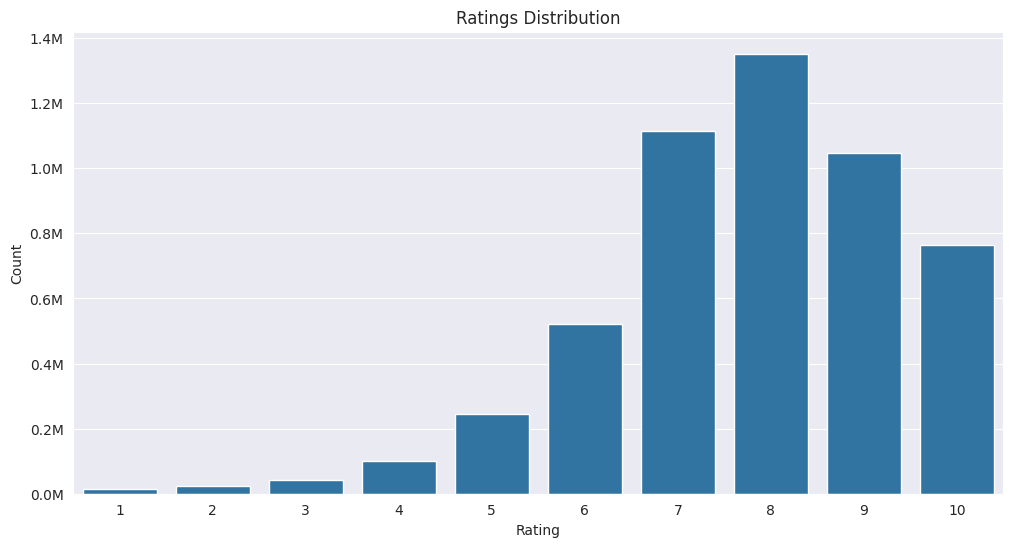

In [ ]:
### (1) Rating Behavior: Rating Distribution
plt.figure(figsize=(12, 6))
sns.set_style("darkgrid")
sns.countplot(x="rating", data=df, order=range(1, 11))
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{x/1e6:.1f}M"))
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Ratings Distribution")
plt.show()

# Most of users rate between 6-10
# A rate >= 8 may be defined as a High Score

##### (2) Who they are: Gender & Age Distribution

/tmp/ipython-input-497711939.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['age_bin', 'Gender'])


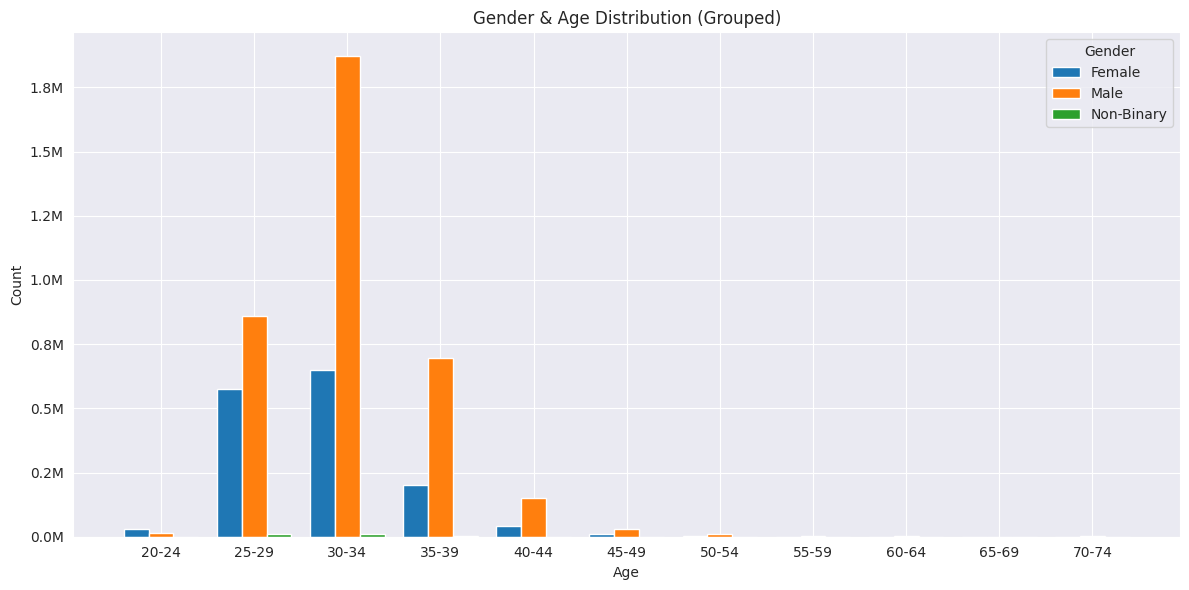

In [ ]:
### (2) Who they are: Gender & Age Distribution
bins = np.arange(20, 80, 5)  # 20,25,...,60
age_bin = pd.cut(df['Age'], bins=bins, right=False, include_lowest=True)

pivot = (df.assign(age_bin=age_bin)
           .groupby(['age_bin', 'Gender'])
           .size()
           .unstack(fill_value=0))

x = np.arange(len(pivot.index))
genders = list(pivot.columns)
bar_w = 0.8 / max(1, len(genders))

fig, ax = plt.subplots(figsize=(12,6))
sns.set_style("darkgrid")
for i, g in enumerate(genders):
    ax.bar(x + i*bar_w - (bar_w*(len(genders)-1))/2, pivot[g].values, width=bar_w, label=str(g))

ax.set_xticks(x)
ax.set_xticklabels([f"{iv.left}-{iv.right-1}" for iv in pivot.index])
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{x/1e6:.1f}M"))
ax.set_xlabel("Age")
ax.set_ylabel("Count")
ax.set_title("Gender & Age Distribution (Grouped)")
ax.legend(title="Gender")
plt.tight_layout()
plt.show()

# Main audiences are people aged 25-39
# We can discover top genres, types, sources of these populations

##### (3) Who are heavy users: Days Watched Distribution

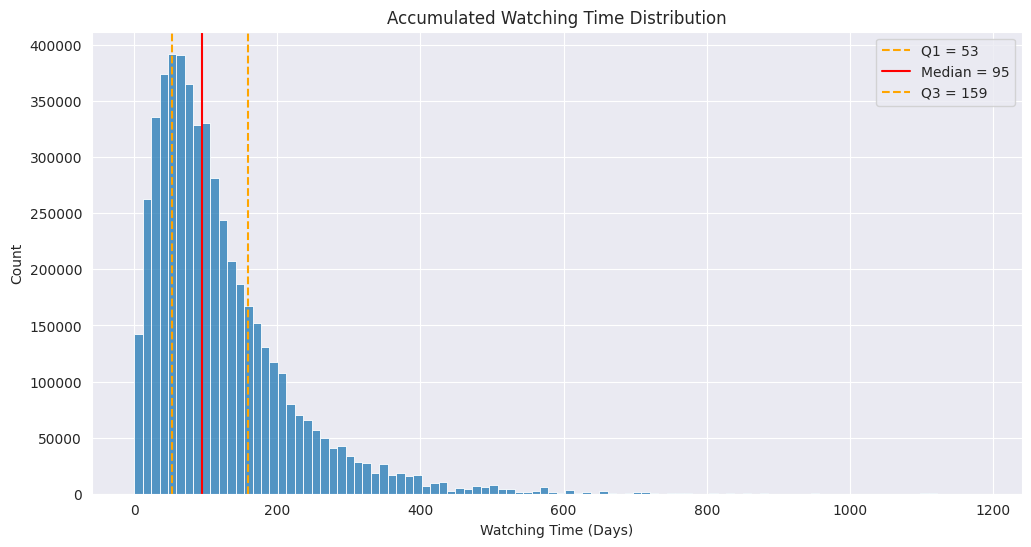

In [ ]:
### (3) Who are heavy users: Days Watched Distribution
plt.figure(figsize=(12, 6))
sns.set_style("darkgrid")
df_sub = df[df["Days Watched"] <= 1200]

q1 = df_sub["Days Watched"].quantile(0.25)
q2 = df_sub["Days Watched"].quantile(0.50)
q3 = df_sub["Days Watched"].quantile(0.75)

sns.histplot(x="Days Watched", bins=100, data=df_sub)

plt.axvline(q1, color="orange", linestyle="--", label=f"Q1 = {q1:.0f}")
plt.axvline(q2, color="red", linestyle="-", label=f"Median = {q2:.0f}")
plt.axvline(q3, color="orange", linestyle="--", label=f"Q3 = {q3:.0f}")

plt.xlabel("Watching Time (Days)")
plt.ylabel("Count")
plt.title("Accumulated Watching Time Distribution")
plt.legend()
plt.show()

# Most of users' days watched are below 159

##### (4) Relation between users' days watched & rating score

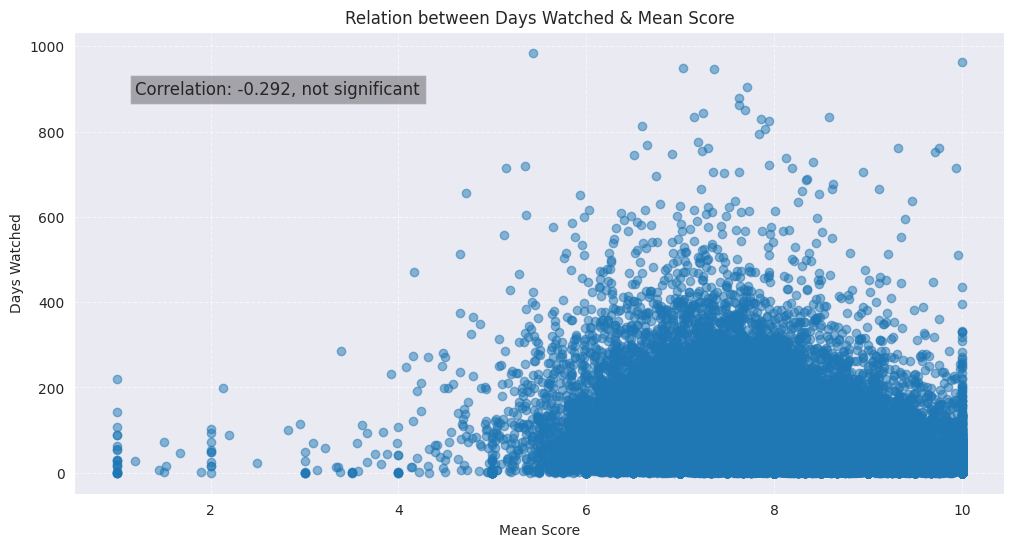

In [ ]:
### (4) Relation between users' days watched & rating behavior
user_day_rating = df.groupby("user_id").agg({
    "Days Watched": "first",
    "Mean Score": "first"
}).reset_index()
user_day_rating = user_day_rating[user_day_rating["Days Watched"] <= 1000]

# correlation
corr = user_day_rating["Days Watched"].corr(user_day_rating["Mean Score"])

plt.figure(figsize=(12, 6))
sns.set_style("darkgrid")
plt.scatter(user_day_rating["Mean Score"], user_day_rating["Days Watched"], alpha=0.5)
plt.title("Relation between Days Watched & Mean Score")
plt.xlabel("Mean Score")
plt.ylabel("Days Watched")
plt.grid(True, linestyle="--", alpha=0.6)

plt.text(
    x=user_day_rating["Mean Score"].min() + 0.2,
    y=user_day_rating["Days Watched"].max() * 0.9,
    s=f"Correlation: {corr:.3f}, not significant",
    fontsize=12,
    bbox=dict(facecolor='black', alpha=0.3)
)

plt.show()

# There is no significant correlation between users' days watched & rating
# Days watched may not be a critical column for building a recommendation system

##### (5) Where do they live: Location Distribution

In [ ]:
top5000_locations = df['Location'].value_counts().head(5000)
top5000_df = top5000_locations.reset_index()

In [ ]:
import re, unicodedata
import pandas as pd

def _normalize_text(s: str) -> str:
    if pd.isna(s):
        return ""
    s = str(s).strip().lower()
    s = unicodedata.normalize("NFKD", s)
    s = "".join(ch for ch in s if not unicodedata.combining(ch))
    return s

# region
REGION_KEYWORDS = {
    "North America": [
        "united states","usa","u.s.","u.s.a","america","us","u s a","u.s","states",
        "canada","mexico","mx",
        # US states/full
        "alabama","alaska","arizona","arkansas","california","colorado","connecticut","delaware","florida",
        "georgia","hawaii","idaho","illinois","indiana","iowa","kansas","kentucky","louisiana","maine","maryland",
        "massachusetts","michigan","minnesota","mississippi","missouri","montana","nebraska","nevada","new hampshire",
        "new jersey","new mexico","new york","north carolina","north dakota","ohio","oklahoma","oregon","pennsylvania",
        "rhode island","south carolina","south dakota","tennessee","texas","utah","vermont","virginia","washington",
        "west virginia","wisconsin","wyoming","dc","washington dc","nyc","new york city",
        "ontario","quebec","british columbia","alberta","manitoba","saskatchewan","nova scotia",
        "new brunswick","newfoundland","prince edward island","pei","nunavut","yukon","northwest territories","nwt","bc",
        "los angeles","san francisco","sf","seattle","chicago","boston","miami","dallas","austin","houston",
        "denver","atlanta","phoenix","philadelphia","san diego","las vegas","orlando","san jose","minneapolis","portland",
        "toronto","vancouver","montreal","calgary","ottawa","edmonton","winnipeg","quebec city","mexico city",
        "guadalajara","monterrey"
    ],
    "Latin America": [
        "argentina","bolivia","brazil","brasil","chile","colombia","costa rica","cuba","dominican republic","dominicana",
        "ecuador","el salvador","guatemala","honduras","nicaragua","panama","paraguay","peru","puerto rico",
        "uruguay","venezuela","belize","suriname","guyana","french guiana","trinidad and tobago",
        "buenos aires","rosario","cordoba","santiago","valparaiso","bogota","medellin","cali","lima","arequipa",
        "quito","guayaquil","la paz","santa cruz","asuncion","montevideo","caracas","san jose costa rica","san salvador",
        "managua","panama city","rio de janeiro","sao paulo","brasilia","salvador","recife","fortaleza","porto alegre",
        "san juan","curitiba","moana","moaña","pontevedra"
    ],
    "Europe": [
        "albania","andorra","austria","belarus","belgium","bosnia","herzegovina","bulgaria","croatia","cyprus",
        "czech","czechia","denmark","estonia","finland","france","germany","greece","hungary","iceland","ireland",
        "italy","kosovo","latvia","liechtenstein","lithuania","luxembourg","malta","moldova","monaco","montenegro",
        "netherlands","holland","north macedonia","norway","poland","portugal","romania","russia","serbia","slovakia",
        "slovenia","spain","sweden","switzerland","turkey","ukraine","united kingdom","uk","scotland","wales","england",
        "isle of man","channel islands","jersey","guernsey","russian federation",
        "london","paris","berlin","rome","milan","madrid","barcelona","valencia","lisbon","porto","amsterdam","rotterdam",
        "brussels","athens","vienna","prague","budapest","warsaw","krakow","stockholm","oslo","helsinki","copenhagen",
        "zurich","geneva","basel","edinburgh","manchester","birmingham","dublin","belgrade","zagreb","sofia","bucharest",
        "istanbul","ankara","saint petersburg","st petersburg","saint-petersburg","minsk","vilnius","riga","tallinn",
        # local language
        "polska","italia","espana","españa","deutschland","schweiz","suisse","suomi","norge","sverige","danmark","europe","europa",
        "wroclaw","wrocław","poznan","poznań","szczecin","lodz","łódź","gdansk","gdańsk","lublin","bialystok","białystok","katowice",
        "hamburg","sevilla","cracow","gdynia","bydgoszcz","belgique","nottingham","glasgow"
    ],
    "Asia": [
        "afghanistan","armenia","azerbaijan","bahrain","bangladesh","bhutan","brunei","cambodia","china","taiwan",
        "hong kong","macau","macao","georgia","india","indonesia","iran","iraq","israel","japan","jordan","kazakhstan",
        "kuwait","kyrgyzstan","laos","lebanon","malaysia","maldives","mongolia","myanmar","burma","nepal","north korea",
        "oman","pakistan","palestine","philippines","qatar","saudi arabia","singapore","south korea","korea","sri lanka",
        "syria","tajikistan","thailand","timor","turkmenistan","united arab emirates","uae","u.a.e","uzbekistan","vietnam","yemen",
        "tokyo","osaka","kyoto","nagoya","fukuoka","beijing","shanghai","guangzhou","shenzhen","chengdu","chongqing","wuhan",
        "hongkong","taipei","taichung","kaohsiung","seoul","busan","incheon","manila","cebu","davao","bangkok","chiang mai",
        "hanoi","ho chi minh","saigon","kuala lumpur","penang","jakarta","surabaya","bali","yogyakarta",
        "delhi","new delhi","mumbai","bangalore","bengaluru","chennai","kolkata","hyderabad","islamabad","lahore","karachi",
        "dhaka","colombo","male","kathmandu","yangon","naypyidaw","phnom penh","vientiane","ulaanbaatar","doha","riyadh",
        "jeddah","mecca","medina","dubai","abu dhabi","sharjah","amman","tehran","baghdad","erbil","ankara","istanbul",
        "tbilisi","almaty","bishkek","dushanbe","ashgabat","tashkent","bandung","akihabara","ksa",
        # local language
        "日本","韩国","韓國","대한민국","한국","中國","中国","台灣","臺灣","香港","イスラエル","ישראל","ישראל‎","دبي","ابوظبي","الرياض","جدة"
    ],
    "Africa": [
        "algeria","angola","benin","botswana","burkina faso","burundi","cabo verde","cape verde","cameroon","central african",
        "chad","comoros","congo","democratic republic of the congo","ivory coast","cote d'ivoire","djibouti","egypt","equatorial guinea",
        "eritrea","eswatini","swaziland","ethiopia","gabon","gambia","ghana","guinea","guinea-bissau","kenya","lesotho","liberia",
        "libya","madagascar","malawi","mali","mauritania","mauritius","morocco","mozambique","namibia","niger","nigeria","rwanda",
        "sao tome","principe","senegal","seychelles","sierra leone","somalia","south africa","sudan","south sudan","tanzania",
        "togo","tunisia","uganda","zambia","zimbabwe","western sahara","réunion","mayotte",
        "cairo","alexandria","casablanca","rabat","marrakesh","lagos","abuja","accra","kumasi","abidjan","dakar","bamako",
        "nairobi","mombasa","addis ababa","johannesburg","cape town","durban","pretoria","tunis","algiers","tripoli",
        "luanda","harare","lusaka","gaborone","kigali","kampala","khartoum","dar es salaam","antananarivo","maputo"
    ],
    "Oceania": [
        "australia","new zealand","fiji","papua new guinea","samoa","tonga","solomon islands","vanuatu","new caledonia",
        "french polynesia","guam","palau","micronesia","marshall islands",
        "sydney","melbourne","brisbane","perth","adelaide","hobart","canberra","darwin","gold coast","auckland","wellington","christchurch",
        "nsw","qld","queensland","victoria","vic","south australia","western australia","wa","nt","tasmania","tas"
    ]
}

# US
US_STATE_ABBRS = set("AL AK AZ AR CA CO CT DE FL GA HI ID IL IN IA KS KY LA ME MD MA MI MN MS MO MT NE NV NH NJ NM NY NC ND OH OK OR PA RI SC SD TN TX UT VT VA WA WV WI WY DC".lower().split())
_state_abbr_pattern = re.compile(r"(?:,\s*|[\s(])(" + "|".join(US_STATE_ABBRS) + r")(?:[\s).,]|$)")

# regex
def _compile_patterns():
    compiled = {}
    for region, words in REGION_KEYWORDS.items():
        pats = []
        for w in words:
            w = _normalize_text(w)
            w_esc = re.escape(w)
            pats.append(rf"(?<![A-Za-z0-9]){w_esc}(?![A-Za-z0-9])")
        compiled[region] = re.compile("|".join(pats))
    return compiled

_COMPILED = _compile_patterns()

def categorize_location(loc: str) -> str:
    s = _normalize_text(loc)
    if not s:
        return "Others"
    # US state abbreviation
    if _state_abbr_pattern.search(s):
        return "North America"
    # compare each each
    for region in ["North America","Latin America","Europe","Asia","Africa","Oceania"]:
        if _COMPILED[region].search(s):
            return region
    return "Others"

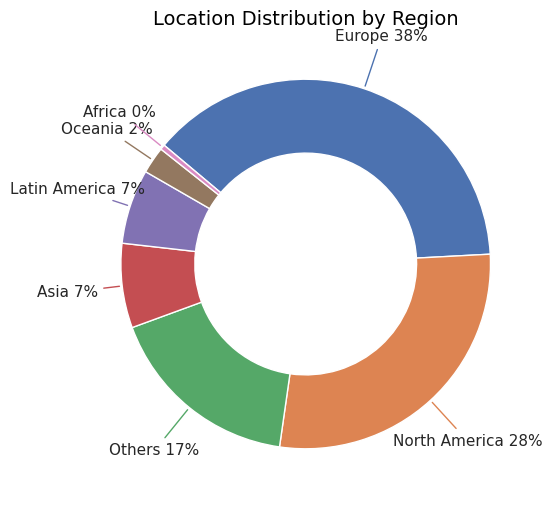

In [ ]:
### (5) Where do they live: Location Distribution
df["Region"] = df["Location"].apply(categorize_location)

region_counts = df["Region"].value_counts()
colors = sns.color_palette("deep", n_colors=len(region_counts))

fig, ax = plt.subplots(figsize=(12, 6))
sns.set_style("darkgrid")
wedges, texts = ax.pie(
    region_counts,
    startangle=140, counterclock=False,
    colors=colors,
    textprops={'fontsize': 12},
    wedgeprops=dict(width=0.4)
)

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    pct = region_counts.iloc[i] / region_counts.sum() * 100
    label = f"{region_counts.index[i]} {pct:.0f}%"
    ax.annotate(label, xy=(x, y), xytext=(1.3*x, 1.3*y),
                ha='center', va='center', fontsize=11,
                arrowprops=dict(arrowstyle="-", color=colors[i], lw=1))

plt.title("Location Distribution by Region", fontsize=14)
plt.show()

# Most of the users are from Europe & North America

### Summary

1. Users generally rate > 6, mostly 7-9. It may be due to that only those who like the anime will rate.
2. The primary users are aged 25-39, living in Europe and North America. This is because the data was originally collected from a western platform called MyAnimeList.
3. There's no significant correlation between users' ratings and engagement levels, indicating that engagement levels may not be a critical column for building a recommendation system.

# Cross-Group Preference Analysis
* Genre Preferences Across Regions
* Genre Preferences Across Age Groups
* Genre Preferences Across Gender

#####  (6) Do users in different regions have various preferences on genre?

In [ ]:
# Build Region with fallback to "Others" and avoid Categorical pitfalls
# convert to plain string dtype
df["Region"] = df["Location"].apply(categorize_location).astype("string")
df["Region"] = df["Region"].fillna("Others")

# Make sure Genres and Score are in usable dtypes
df["Genres"] = df["Genres"].astype("string")
df["Score"] = pd.to_numeric(df["Score"], errors="coerce")  # force numeric; invalid -> NaN

# Split multi-value Genres into multiple rows
df_exp = df.copy()
df_exp["Genre"] = df_exp["Genres"].fillna("").str.split(",")
df_exp = df_exp.explode("Genre", ignore_index=True)
df_exp["Genre"] = df_exp["Genre"].astype("string").str.strip()
df_exp = df_exp[df_exp["Genre"] != ""]

# Keep only main genres with enough frequency across the dataset
min_count = 200
genre_counts = df_exp["Genre"].value_counts()
main_genres = set(genre_counts[genre_counts >= min_count].index)
df_exp = df_exp[df_exp["Genre"].isin(main_genres)]

# Fix region order
region_order = ["Europe", "North America", "Asia", "Latin America", "Oceania", "Africa", "Others"]

# Aggregate mean score and sample size for Region × Genre
agg = (df_exp
       .groupby(["Region", "Genre"], as_index=False)
       .agg(avg_score=("Score", "mean"),
            n=("Score", "size")))

# Mask cells with too few samples to avoid unreliable means
cell_min_n = 50
agg["avg_score"] = agg["avg_score"].where(agg["n"] >= cell_min_n, np.nan)

# Pivot to matrices for heatmaps
heat_avg = (agg
            .pivot(index="Region", columns="Genre", values="avg_score")
            .reindex(index=region_order))

heat_n = (agg
          .pivot(index="Region", columns="Genre", values="n")
          .reindex(index=region_order))

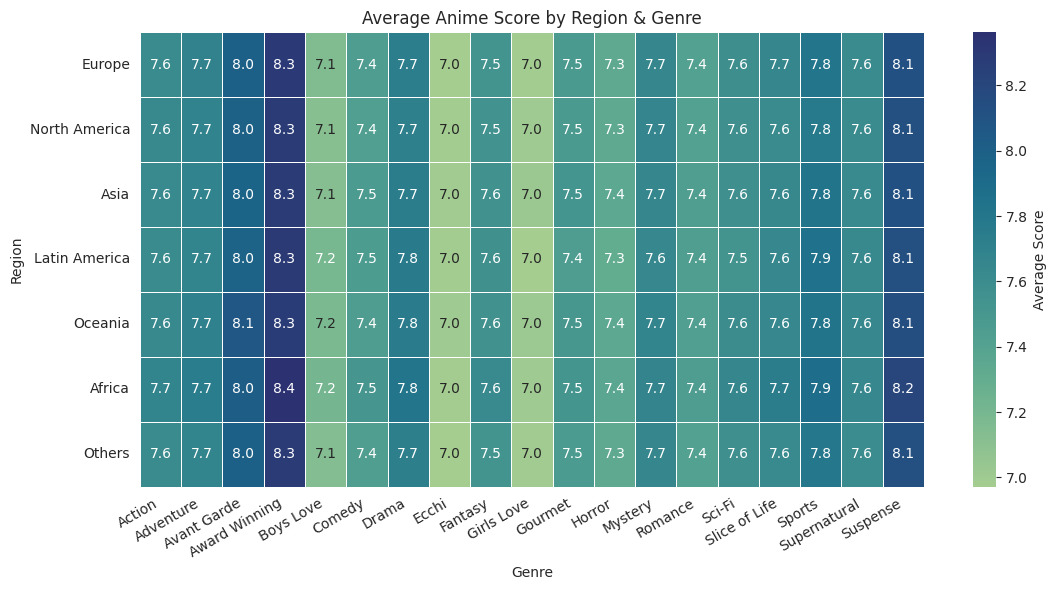

In [ ]:
# Plot: Average Score heatmap
plt.figure(figsize=(max(8, 0.6 * max(1, heat_avg.shape[1])), 6))
ax = sns.heatmap(
    heat_avg,
    cmap="crest",
    annot=True,
    fmt=".1f",
    linewidths=0.5,
    linecolor="white",
    cbar_kws={"label": "Average Score"}
)
ax.set_xlabel("Genre")
ax.set_ylabel("Region")
ax.set_title("Average Anime Score by Region & Genre")
plt.xticks(rotation=30, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# The preferences of genres are consistent across regions.
# Thus, region may not be a critical column to build a recommendation system.

##### (7) & (8) Do users in different age & gender have various preferences on genre?

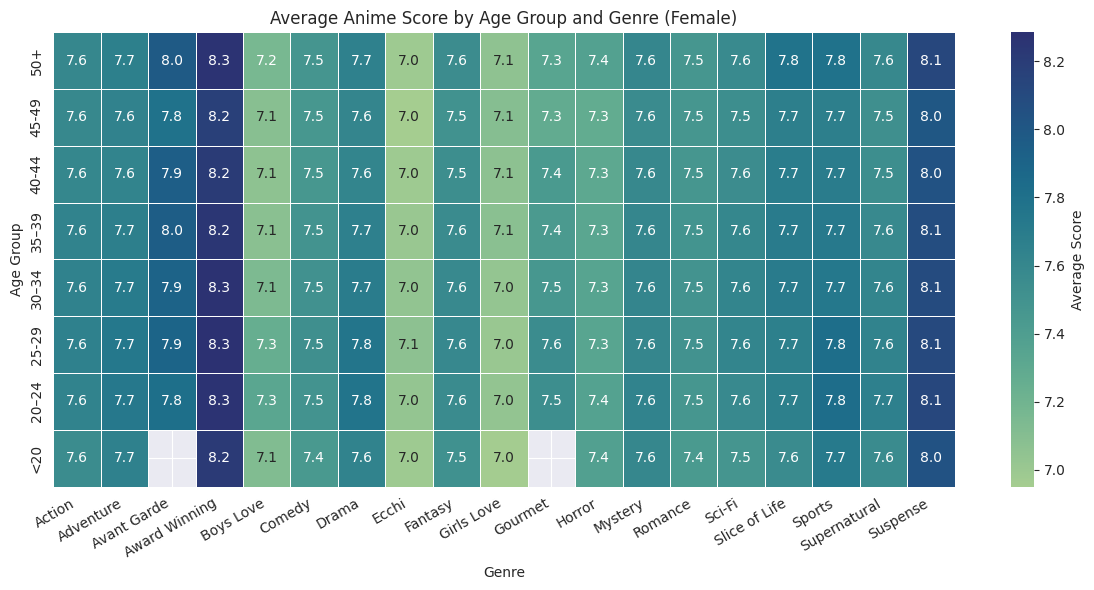

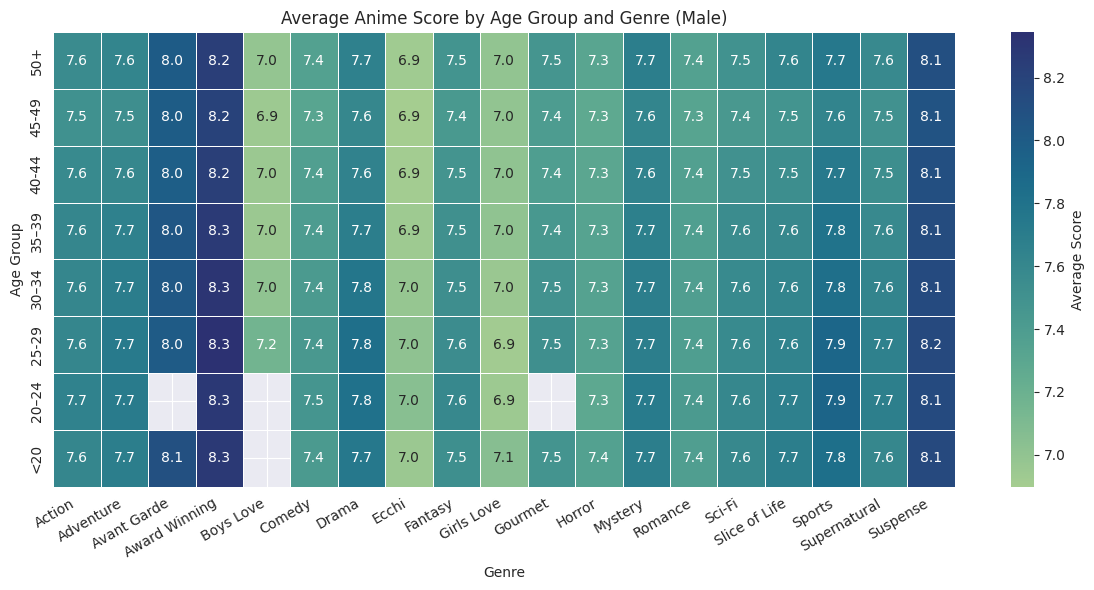

In [ ]:
# Create Age Groups
bins = [0, 19, 24, 29, 34, 39, 44, 49, 100]
labels = ['<20', '20–24', '25-29', '30–34', '35–39', '40-44', '45-49','50+']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Clean and Split Genres
df['Genres'] = df['Genres'].astype('string')
df_exp = df.copy()
df_exp['Genre'] = df_exp['Genres'].fillna('').str.split(',')
df_exp = df_exp.explode('Genre', ignore_index=True)
df_exp['Genre'] = df_exp['Genre'].astype('string').str.strip()
df_exp = df_exp[df_exp['Genre'] != '']

# Keep Only Main Genres
min_count = 200
genre_counts = df_exp['Genre'].value_counts()
main_genres = set(genre_counts[genre_counts >= min_count].index)
df_exp = df_exp[df_exp['Genre'].isin(main_genres)]

# Ensure Score is Numeric
df_exp['Score'] = pd.to_numeric(df_exp['Score'], errors='coerce')

# Drop rows with NaN Age_Group, Gender, or Score to avoid mismatched groupby index
df_exp = df_exp.dropna(subset=['Age_Group', 'Gender', 'Score'])

# Aggregate Mean Scores by Gender × Age_Group × Genre
agg = (
    df_exp
    .groupby(['Gender', 'Age_Group', 'Genre'], as_index=False, observed=True)
    .agg(avg_score=('Score', 'mean'), n=('Score', 'size'))
)

# Mask cells with too few samples to avoid unreliable means
cell_min_n = 50
agg['avg_score'] = agg['avg_score'].where(agg['n'] >= cell_min_n, np.nan)

# Pivot Tables for Each Gender
heat_female = (
    agg[agg['Gender'] == 'Female']
    .pivot(index='Age_Group', columns='Genre', values='avg_score')
)

heat_male = (
    agg[agg['Gender'] == 'Male']
    .pivot(index='Age_Group', columns='Genre', values='avg_score')
)

# Plot Heatmaps
# Reverse the order of Age_Group (so older on top, younger at bottom)
heat_female = heat_female.iloc[::-1]
heat_male = heat_male.iloc[::-1]

plt.figure(figsize=(12, 6))
sns.set_style("darkgrid")
sns.heatmap(
    heat_female,
    cmap='crest',
    annot=True,
    fmt='.1f',
    linewidths=0.4,
    linecolor='white',
    cbar_kws={'label': 'Average Score'}
)
plt.title('Average Anime Score by Age Group and Genre (Female)')
plt.xlabel('Genre')
plt.ylabel('Age Group')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.set_style("darkgrid")
sns.heatmap(
    heat_male,
    cmap='crest',
    annot=True,
    fmt='.1f',
    linewidths=0.4,
    linecolor='white',
    cbar_kws={'label': 'Average Score'}
)
plt.title('Average Anime Score by Age Group and Genre (Male)')
plt.xlabel('Genre')
plt.ylabel('Age Group')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

### Summary

1. There's no difference of preferences on animes among users from different regions, age groups, and genders.
2. It indicates that these personal traits are not critical for building a recommendation system.

# Main Audience Insights (Ages 25–39)
* Main Audience’s Preference on Genres
* Main Audience’s Preference on Sources

##### (9) Main audiences' preference on genres

/tmp/ipython-input-3624232896.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('AgeGroup', group_keys=False)
/tmp/ipython-input-3624232896.py:26: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(5, 'rating'))


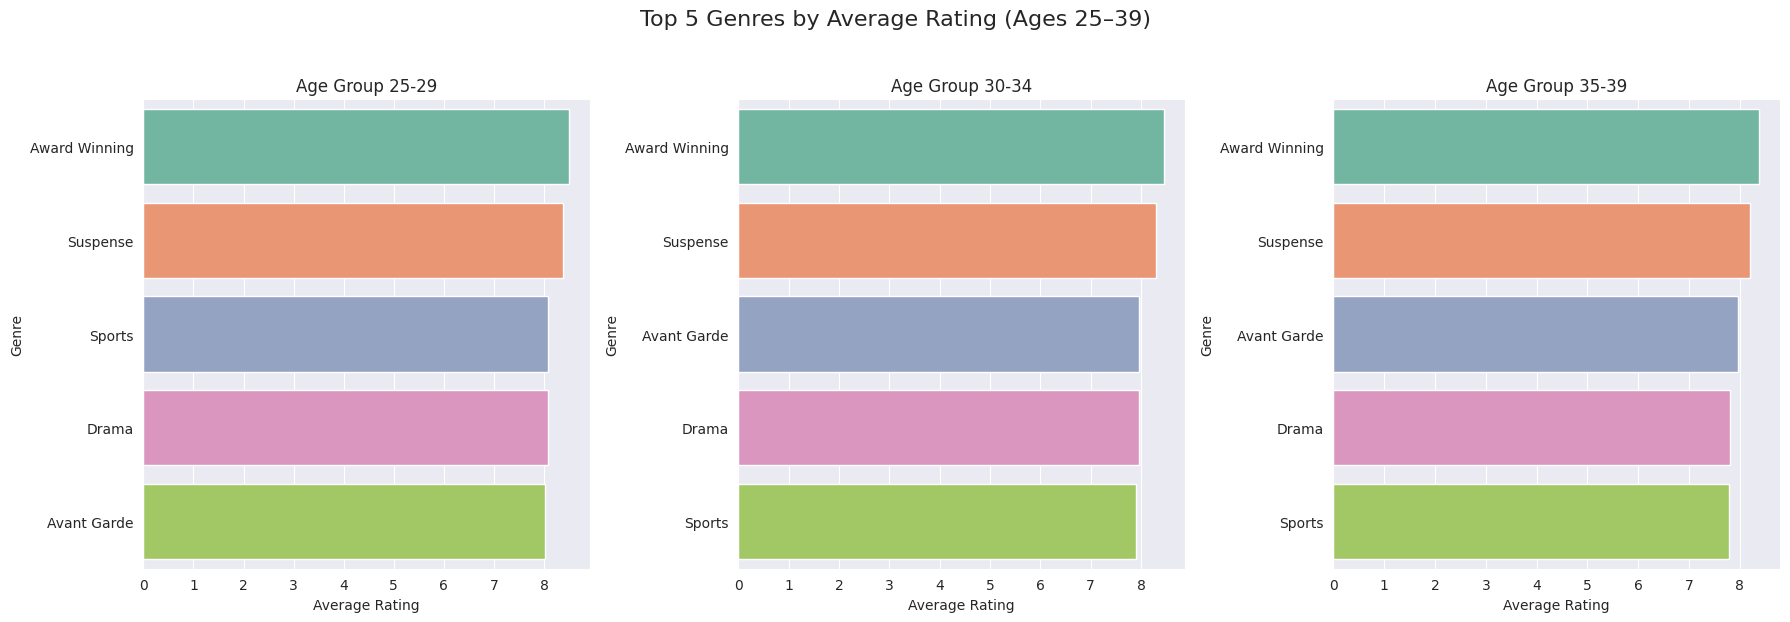

In [ ]:
bins = [25, 30, 35, 40]
labels = ['25-29', '30-34', '35-39']
df_main_audience = df.assign(
    AgeGroup=pd.cut(df['Age'], bins=bins, labels=labels, right=False)
)

# Expand Genres into rows
df_expanded = df_main_audience.copy()
df_expanded['Genres'] = df_expanded['Genres'].str.split(',')
df_expanded = df_expanded.explode('Genres')
df_expanded['Genres'] = df_expanded['Genres'].str.strip()

# Compute average rating per (AgeGroup, Genre)
avg_ratings = (
    df_expanded
    .dropna(subset=['AgeGroup', 'Genres'])
    .groupby(['AgeGroup', 'Genres'], observed=True)['rating']
    .mean()
    .reset_index()
)

# Take top-5 genres within each target age group
top5_per_age = (
    avg_ratings
    .groupby('AgeGroup', group_keys=False)
    .apply(lambda x: x.nlargest(5, 'rating'))
    .reset_index(drop=True)
)

# Plot three horizontal bar charts in a single figure
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=False)
sns.set_style("darkgrid")

for ax, age in zip(axes, labels):
    subset = top5_per_age[top5_per_age['AgeGroup'] == age]

    if subset.empty:
        ax.set_title(f"Age Group {age}")
        ax.text(0.5, 0.5, "No data", ha="center", va="center", transform=ax.transAxes)
        ax.axis('off')
        continue

    # Bar chart
    sns.barplot(
        data=subset,
        x='rating',
        y='Genres',
        hue='Genres',
        palette='Set2',
        dodge=False,
        ax=ax
    )
    ax.set_title(f"Age Group {age}")
    ax.set_xlabel("Average Rating")
    ax.set_ylabel("Genre")
    if ax.legend_ is not None:
        ax.legend_.remove()

plt.suptitle("Top 5 Genres by Average Rating (Ages 25–39)", fontsize=16, y=1.03)
plt.tight_layout()
plt.show()

# Top 5 genres are Award Winning, Suspense, Avant Garde, Drame, Sports for main audience

##### (10) Main audiences' preference on sources

/tmp/ipython-input-3666889430.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('AgeGroup', group_keys=False)
/tmp/ipython-input-3666889430.py:26: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(4, 'rating'))


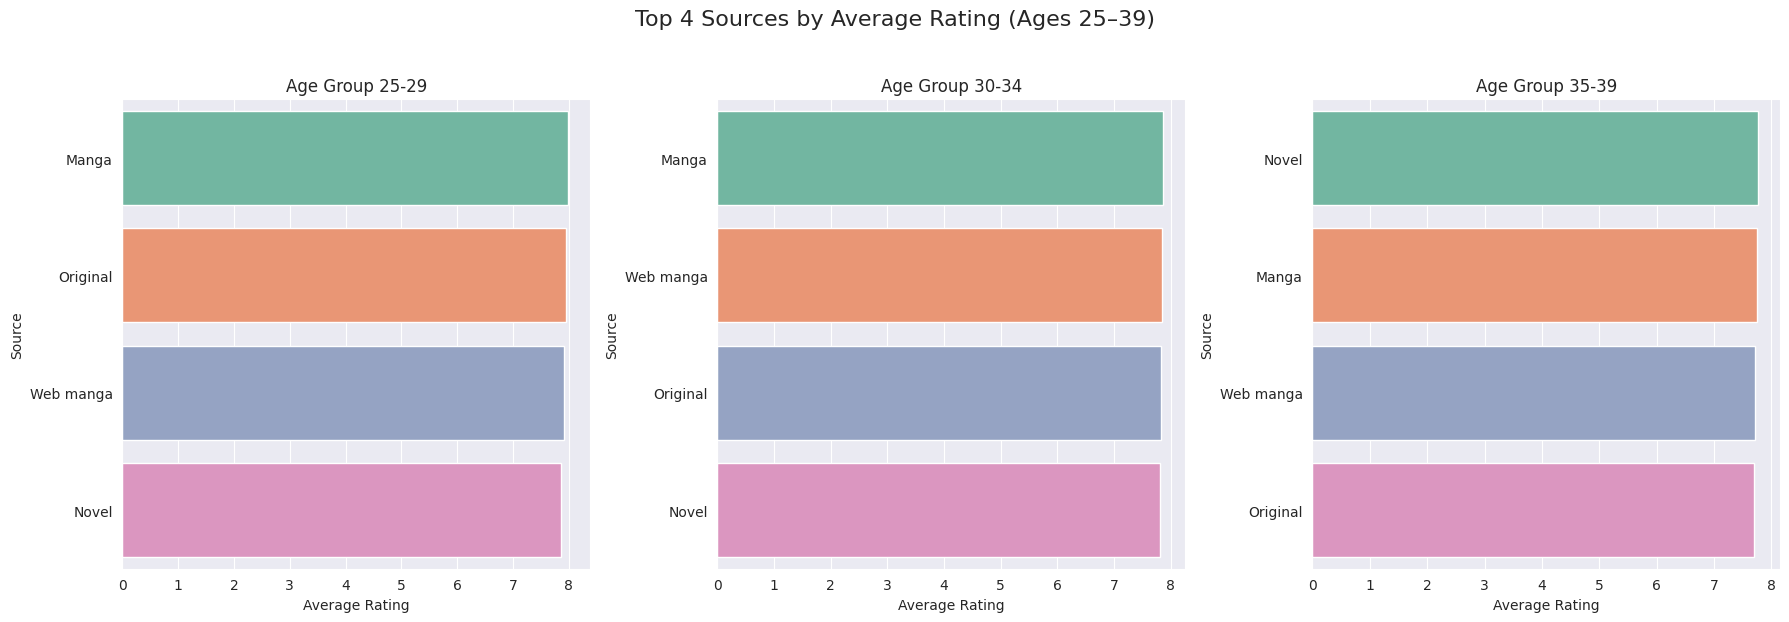

In [ ]:
bins = [25, 30, 35, 40]
labels = ['25-29', '30-34', '35-39']
df_main_audience = df.assign(
    AgeGroup=pd.cut(df['Age'], bins=bins, labels=labels, right=False)
)

# Expand Source into rows
df_expanded_source = df_main_audience.copy()
df_expanded_source['Source'] = df_expanded_source['Source'].str.split(',')
df_expanded_source = df_expanded_source.explode('Source')
df_expanded_source['Source'] = df_expanded_source['Source'].str.strip()

# Compute average rating per (AgeGroup, Source)
avg_ratings = (
    df_expanded_source
    .dropna(subset=['AgeGroup', 'Source'])
    .groupby(['AgeGroup', 'Source'], observed=True)['rating']
    .mean()
    .reset_index()
)

# Take top-3 Source within each target age group
top4_per_age = (
    avg_ratings
    .groupby('AgeGroup', group_keys=False)
    .apply(lambda x: x.nlargest(4, 'rating'))
    .reset_index(drop=True)
)

# Plot three horizontal bar charts in a single figure
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=False)
sns.set_style("darkgrid")

for ax, age in zip(axes, labels):
    subset = top4_per_age[top4_per_age['AgeGroup'] == age]

    if subset.empty:
        ax.set_title(f"Age Group {age}")
        ax.text(0.5, 0.5, "No data", ha="center", va="center", transform=ax.transAxes)
        ax.axis('off')
        continue

    # Bar chart
    sns.barplot(
        data=subset,
        x='rating',
        y='Source',
        hue='Source',
        palette='Set2',
        dodge=False,
        ax=ax
    )
    ax.set_title(f"Age Group {age}")
    ax.set_xlabel("Average Rating")
    ax.set_ylabel("Source")
    if ax.legend_ is not None:
        ax.legend_.remove()

plt.suptitle("Top 4 Sources by Average Rating (Ages 25–39)", fontsize=16, y=1.03)
plt.tight_layout()
plt.show()

# Top 4 sources are Manga, Original, Web Mange, Novel

### Summary

In the main audiences aged 25-39,
1. Top 5 Genres🎭: Award Winning, Suspense, Avant Garde, Drama, Sports
2. Top 4 Sources📚:  Manga, Original, Web Manga, Novel

# Popularity & Ranking Relationships
* Relation Between Rank & Popularity
* Relation Between Score & Popularity

##### (11) Relation between Rank & Popularity

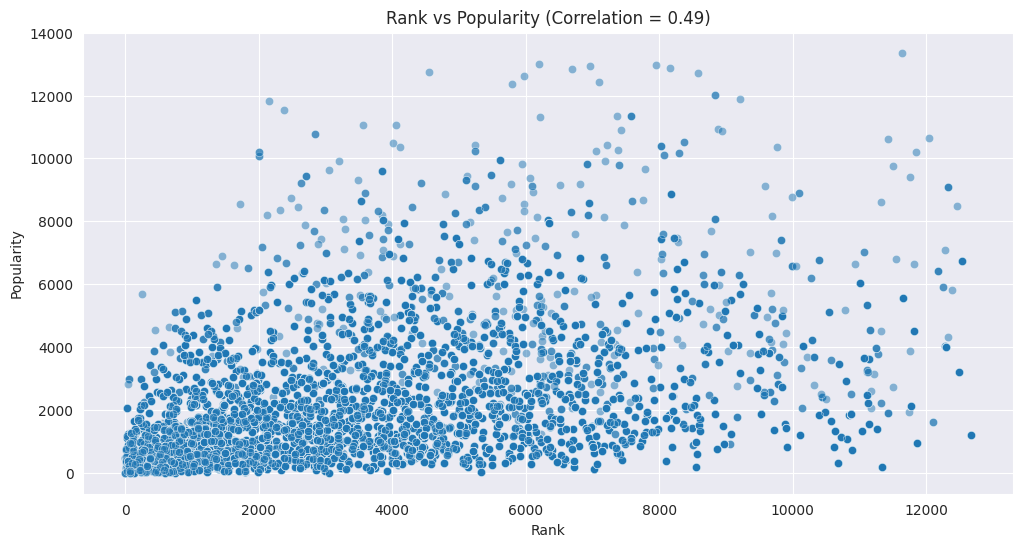

In [ ]:
# Relation between Rank & Popularity
plt.figure(figsize=(12,6))
sns.set_style("darkgrid")
df_rank_popu = df.sample(n=100000, random_state=42)
sns.scatterplot(x="Rank", y="Popularity", data=df_rank_popu, alpha=0.5)
corr = df["Rank"].corr(df["Popularity"])
plt.title(f"Rank vs Popularity (Correlation = {corr:.2f})")
plt.xlabel("Rank")
plt.ylabel("Popularity")
plt.show()

# There's a moderate positive correlation between Rank & Popularity
# It indicates that connection is not so strong

##### (12) Relation between Score & Popularity

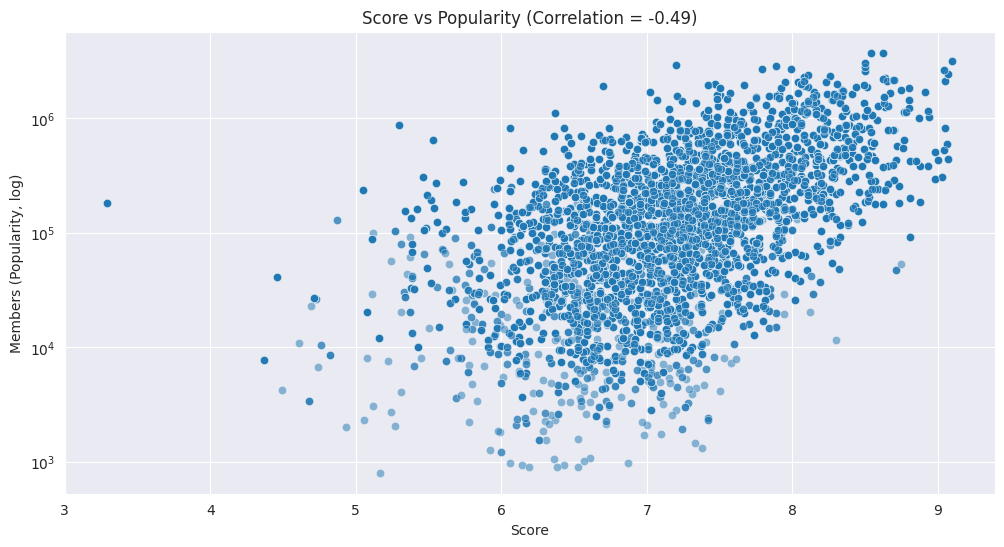

In [ ]:
# Relation between Score & Popularity
df_score_popu = df.sample(n=100000, random_state=42)

plt.figure(figsize=(12,6))
sns.set_style("darkgrid")
sns.scatterplot(
    data=df_score_popu,
    x="Score",
    y="Members",
    alpha=0.5,
)
corr = df["Score"].corr(df["Popularity"])
plt.yscale("log")
plt.title(f"Score vs Popularity (Correlation = {corr:.2f})")
plt.ylabel("Members (Popularity, log)")
plt.xlabel("Score")
plt.show()

# There's a moderate negative correlation between Rank & Popularity
# It indicated that there are still many exceptions

In [ ]:
# Prepare numeric
df_top = anime_cleaned[["anime_id", "English name", "Score", "Members"]].copy()
df_top["Score"] = pd.to_numeric(df_top["Score"], errors="coerce")
df_top["Members"] = pd.to_numeric(df_top["Members"], errors="coerce")
df_top = df_top.dropna(subset=["Score", "Members"])

top100_score = df_top.nlargest(100, "Score")
top100_members = df_top.nlargest(100, "Members")

set_score = set(top100_score["anime_id"])
set_members = set(top100_members["anime_id"])
overlap_ids = set_score & set_members

print("\n=== Overlap between Top-100 by Score and Top-100 by Members ===")
print(f"Count of overlapping anime_id: {len(overlap_ids)}")

# Only 30% overlap of top rated and saved animes
# Popularity and quality do not perfectly align


=== Overlap between Top-100 by Score and Top-100 by Members ===
Count of overlapping anime_id: 30


### Summary

1. Rank, score and popularity are not significantly correlated. It indicates that there are still many exceptions
2. Only 30% overlap of top rated and saved animes
3. We should not build the reccomendation system only based on the popularity and rank of animes.

# Rating Consistency Analysis
* Within Same Genre
* Within Same Type
* Within Same Source

##### (13) Rating consistency within the same Genre

In [ ]:
# Filter out rows with Genre & Score value
df_consistency_genre = df_exp.dropna(subset=["Genres", "rating"])

# Calculate score Mean, Var, Views for each user
user_genre_stats = (
    df_consistency_genre
    .groupby(["user_id", "Genre"])
    .agg(
        mean_score=("Score", "mean"),
        var_score=("Score", "var"),
        n=("Score", "size")
    )
    .reset_index()
)

# Remove genres that views < 3
user_genre_stats = user_genre_stats[user_genre_stats["n"] >= 3]

# Small Var -> Stable rating on same genre
user_consistency_genre = (
    user_genre_stats
    .groupby("user_id")
    .agg(
        mean_var=("var_score", "mean"),
        mean_score=("mean_score", "mean"),
        genre_count=("Genre", "count")
    )
    .reset_index()
)

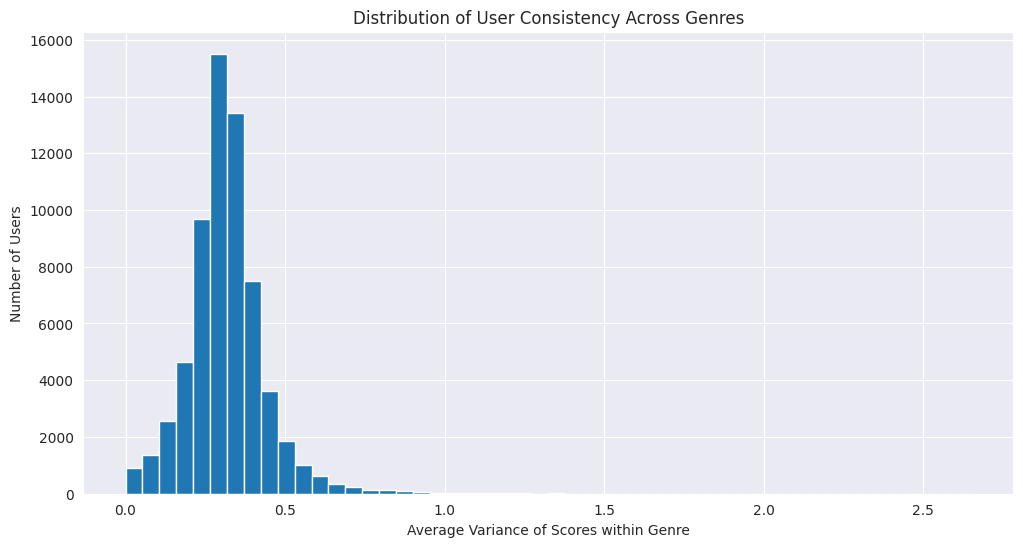

In [ ]:
plt.figure(figsize=(12,6))
sns.set_style("darkgrid")
plt.hist(user_consistency_genre["mean_var"].dropna(), bins=50)
plt.xlabel("Average Variance of Scores within Genre")
plt.ylabel("Number of Users")
plt.title("Distribution of User Consistency Across Genres")
plt.show()

In [ ]:
(user_consistency_genre["mean_var"] < 0.5).mean()

# std of ratings is ~0.7
# 94% of users exhibit low rating variance (fluctuation < 1)
# Genre serves as a meaningful preference feature

np.float64(0.9413275292422842)

##### (14) Rating consistency within the same Type

In [ ]:
# Filter out rows with Type & Score value
df_consistency_type = df_exp.dropna(subset=["Type", "rating"])

# Calculate score Mean, Var, Views for each user
user_type_stats = (
    df_consistency_type
    .groupby(["user_id", "Type"])
    .agg(
        mean_score=("Score", "mean"),
        var_score=("Score", "var"),
        n=("Score", "size")
    )
    .reset_index()
)

# Remove types that views < 3
user_type_stats = user_type_stats[user_type_stats["n"] >= 3]

# Small Var -> Stable rating on same genre
user_consistency_type = (
    user_type_stats
    .groupby("user_id")
    .agg(
        mean_var=("var_score", "mean"),
        mean_score=("mean_score", "mean"),
        type_count=("Type", "count")
    )
    .reset_index()
)

/tmp/ipython-input-718442016.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["user_id", "Type"])


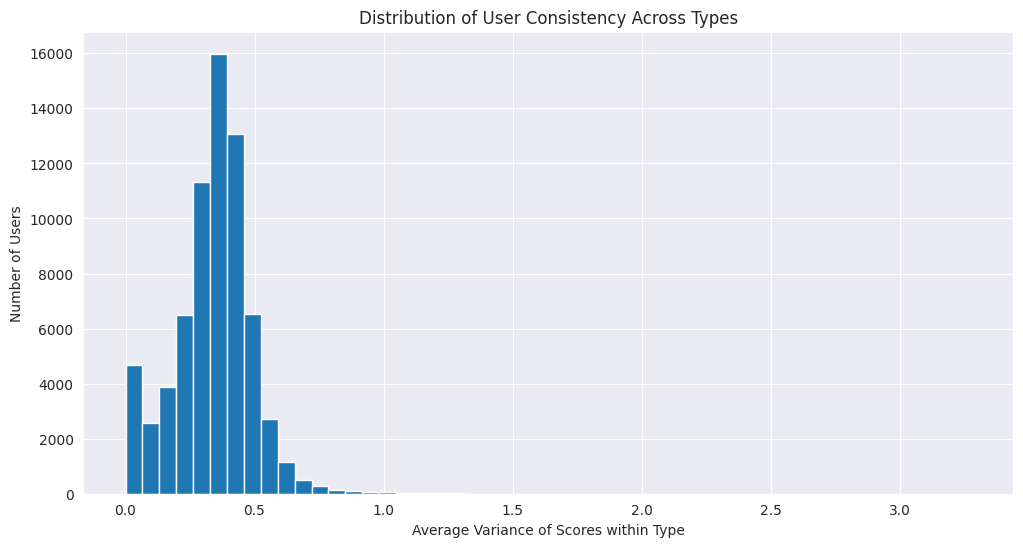

In [ ]:
plt.figure(figsize=(12,6))
sns.set_style("darkgrid")
plt.hist(user_consistency_type["mean_var"].dropna(), bins=50)
plt.xlabel("Average Variance of Scores within Type")
plt.ylabel("Number of Users")
plt.title("Distribution of User Consistency Across Types")
plt.show()

# std of ratings is ~0.7
# 90% of users exhibit low rating variance (fluctuation < 1)
# Type serves as a meaningful preference feature

In [ ]:
(user_consistency_type["mean_var"] < 0.5).mean()

np.float64(0.9007310172485602)

##### (15) Rating consistency within the same Source

In [ ]:
# Filter out rows with Source & Score value
df_consistency_source = df_exp.dropna(subset=["Source", "rating"])

# Calculate score Mean, Var, Views for each user
user_source_stats = (
    df_consistency_source
    .groupby(["user_id", "Source"])
    .agg(
        mean_score=("Score", "mean"),
        var_score=("Score", "var"),
        n=("Score", "size")
    )
    .reset_index()
)

# Remove sources that views < 3
user_source_stats = user_source_stats[user_source_stats["n"] >= 3]

# Small Var -> Stable rating on same genre
user_consistency_source = (
    user_source_stats
    .groupby("user_id")
    .agg(
        mean_var=("var_score", "mean"),
        mean_score=("mean_score", "mean"),
        source_count=("Source", "count")
    )
    .reset_index()
)

/tmp/ipython-input-784154703.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["user_id", "Source"])


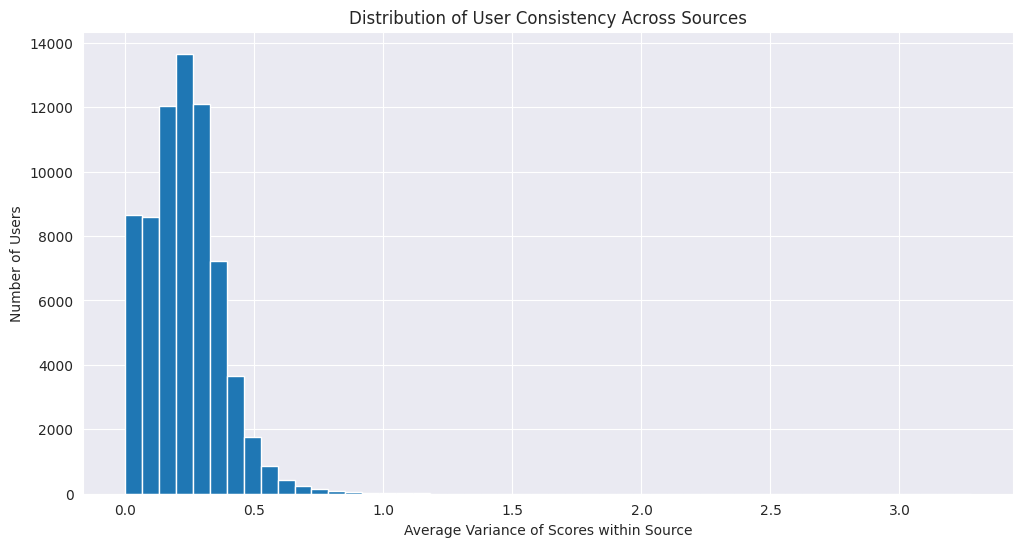

In [ ]:
plt.figure(figsize=(12,6))
sns.set_style("darkgrid")
plt.hist(user_consistency_source["mean_var"].dropna(), bins=50)
plt.xlabel("Average Variance of Scores within Source")
plt.ylabel("Number of Users")
plt.title("Distribution of User Consistency Across Sources")
plt.show()

# std of ratings is ~0.7
# 96% of users exhibit low rating variance (fluctuation < 1)
# Source serves as a meaningful preference feature

In [ ]:
(user_consistency_source["mean_var"] < 0.5).mean()

np.float64(0.9654111115905136)

### Summary

1. Users' standard deviation of ratings is about 0.7
2. More than 90% of users exhibit low rating variance (fluctuation < 1)
3. Genre, Type, and Source serve as meaningful preference features because it may be properly used to predict whether a user will like next anime

# Conclusion

**I. Audience Insights**

The majority of users are aged 25–39, mainly located in Europe and North America. Their rating behaviors are consistent across region, gender, and age, indicating no significant demographic segmentation in anime preferences.

**II. Content Strategy: What to Air**

Since preferences remain stable across different user groups, platforms should focus on content that appeals broadly.

* Top 5 Genres 🎭: Award Winning, Suspense, Avant Garde, Drama, Sports

* Top 4 Sources 📚: Manga, Original, Web Manga, Novel

**III. User Engagement Patterns**

* While most users’ viewing days fall below 159 and show no clear correlation with rating behavior, engagement levels do not strongly influence satisfaction.
* Popularity and quality only partially overlap (30%), suggesting both should be considered when curating or promoting titles.

**IV. Recommendation System Design**

Given users’ consistent behavior and high rating stability (low variance within genre/type/source), an item-based recommendation approach is more suitable than a user-based one.
* Key predictive features: Genre, Type, and Source.

**V. Strategic Implication**

Platforms should prioritize content diversity within high-performing genres and sources, and refine their recommendation systems around item attributes rather than user demographics or viewing time. This approach maximizes relevance and scalability while aligning with audience preferences.

# Challenges

* Huge size of dataset made it difficult to merge. -> Check whether the session will crack in every step.
* Few knowledge of machine learning. -> Focus on examining correlation between factors to yield insights.

# Generative AI Disclosure

ChatGPT was used to assist in the development of this analysis in the following areas:
* Assist joining the 3 datasets, writing codes to examine the file size and converting data types.
* Convert location into regions
* Debug whenever errors occurr
* Summarize the analysis content and draft the outline of conclusion

Our team has reviewed, edited, and validated all AI-generated content to ensure its accuracy, relevance, and originality in accordance with academic integrity guidelines.